In [ ]:
#1: Data Preparation and Exploration
Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.
Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.
Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv('/content/exchange_rate.csv')

# Display the first few rows of the dataset
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


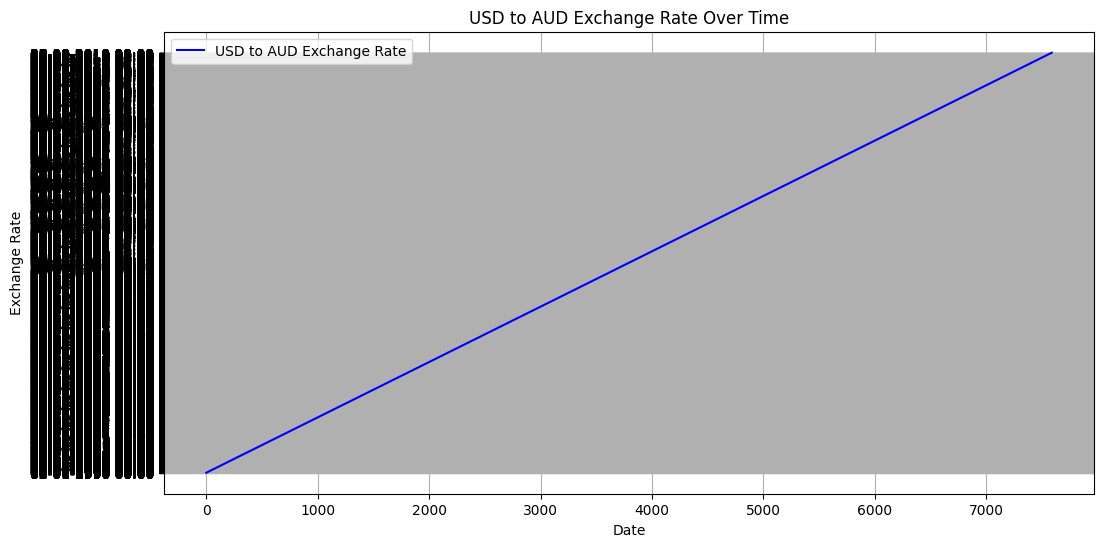

In [2]:
# Plot the exchange rate time series
plt.figure(figsize=(12, 6))
plt.plot(data['date'], label='USD to AUD Exchange Rate', color='blue')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# If there are missing values, consider filling them
if missing_values['date'] > 0:
    # Fill missing values using forward fill method or interpolation
    data['USD_AUD'].fillna(method='ffill', inplace=True)

# Re-check for missing values after imputation
missing_values_after = data.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after)

Missing Values in Each Column:
 date       0
Ex_rate    0
dtype: int64
Missing Values After Imputation:
 date       0
Ex_rate    0
dtype: int64


In [9]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.3 MB/s eta 0:00:00


In [11]:
from pmdarima import auto_arima

# Fit auto ARIMA model
auto_arima = auto_arima(data['Ex_rate'], seasonal=False, stepwise=True, trace=True)
print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56098.154, Time=6.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-55972.211, Time=4.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56102.338, Time=1.75 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56100.772, Time=6.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-55974.195, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-56100.340, Time=2.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56100.341, Time=4.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-56098.328, Time=5.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-56104.319, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-56102.321, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56102.322, Time=1.60 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-56102.753, Time=0.87 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-56100.315, Time=2.15 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 36.691 sec

In [22]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 6
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['text.color'] = 'b'

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
model_es = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal=None)
model_es_fit = model_es.fit()

# Forecast the next 12 months
forecast_es = model_es_fit.forecast(steps=n_periods)
forecast_es_df = pd.DataFrame(forecast_es, index=[0], columns=['date'])

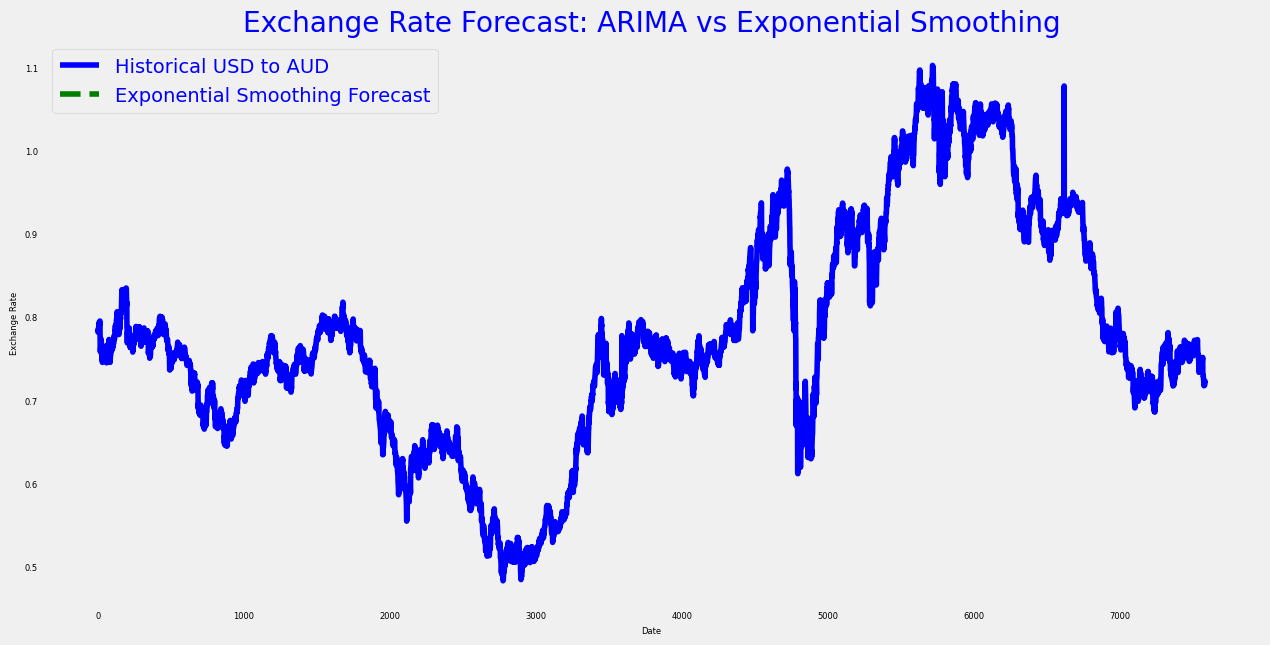

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(data['Ex_rate'], label='Historical USD to AUD', color='blue')
plt.plot(forecast_es_df, label='Exponential Smoothing Forecast', color='green', linestyle='--')
plt.title('Exchange Rate Forecast: ARIMA vs Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()

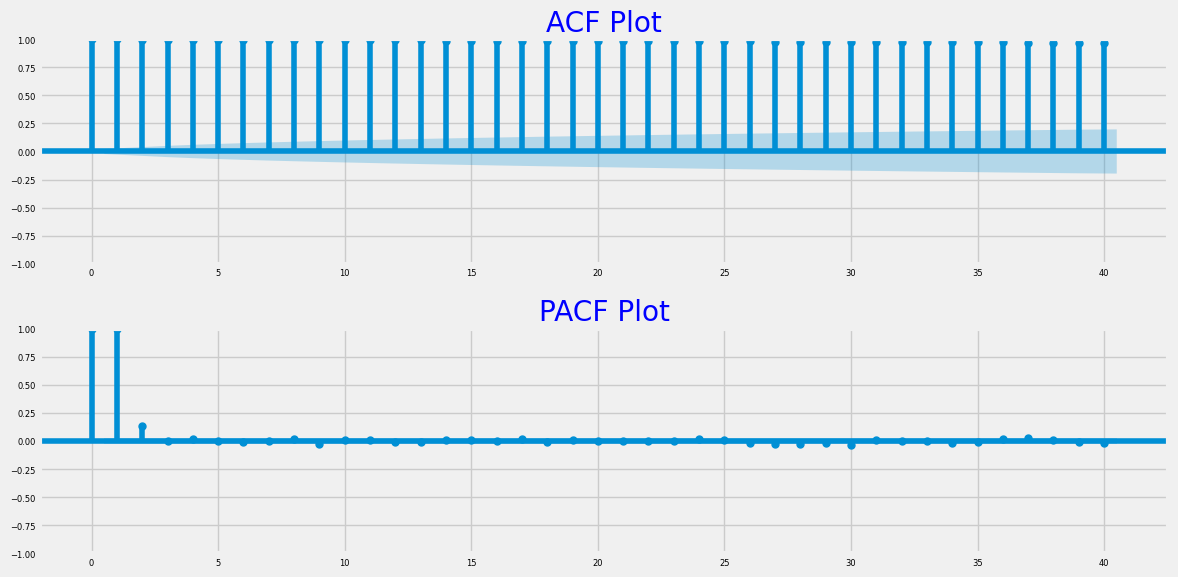

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(data['Ex_rate'], ax=plt.gca(), lags=40)
plt.title('ACF Plot')

plt.subplot(212)
plot_pacf(data['Ex_rate'], ax=plt.gca(), lags=40)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model (p, d, q)
p, d, q = 1, 1, 1  # replace with your chosen parameters
model = ARIMA(data['Ex_rate'], order=(p, d, q))
fitted_model = model.fit()

print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 30 Oct 2024   AIC                         -56102.322
Time:                        05:25:58   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

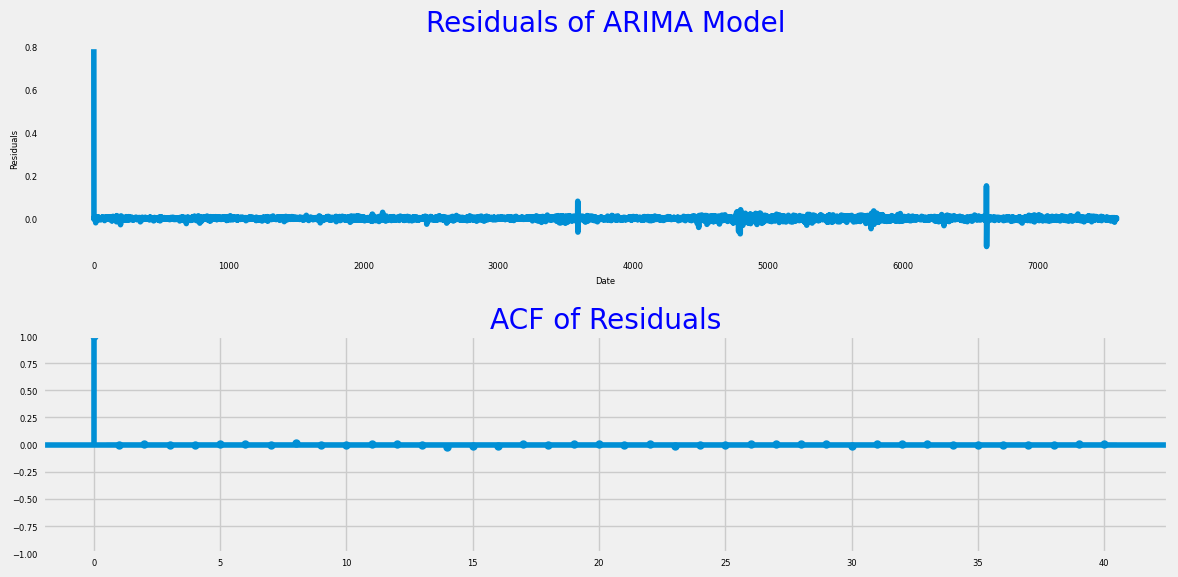

In [38]:
# Residual diagnostics
residuals = fitted_model.resid

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid()

plt.subplot(212)
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()

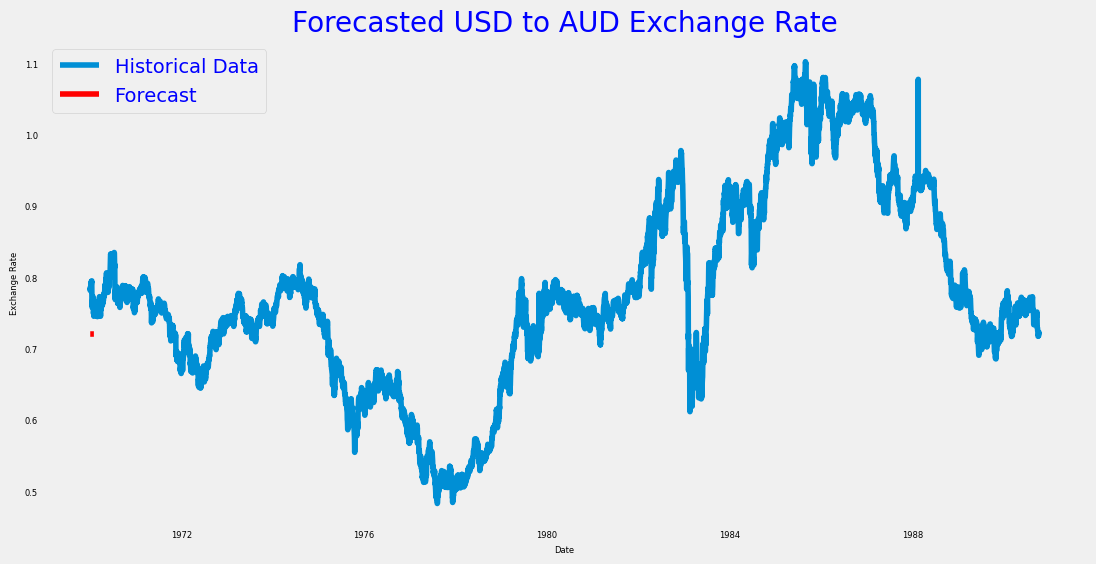

In [40]:
# Forecasting
forecast_steps = 30  # number of steps to forecast
forecast = fitted_model.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('Forecasted USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()

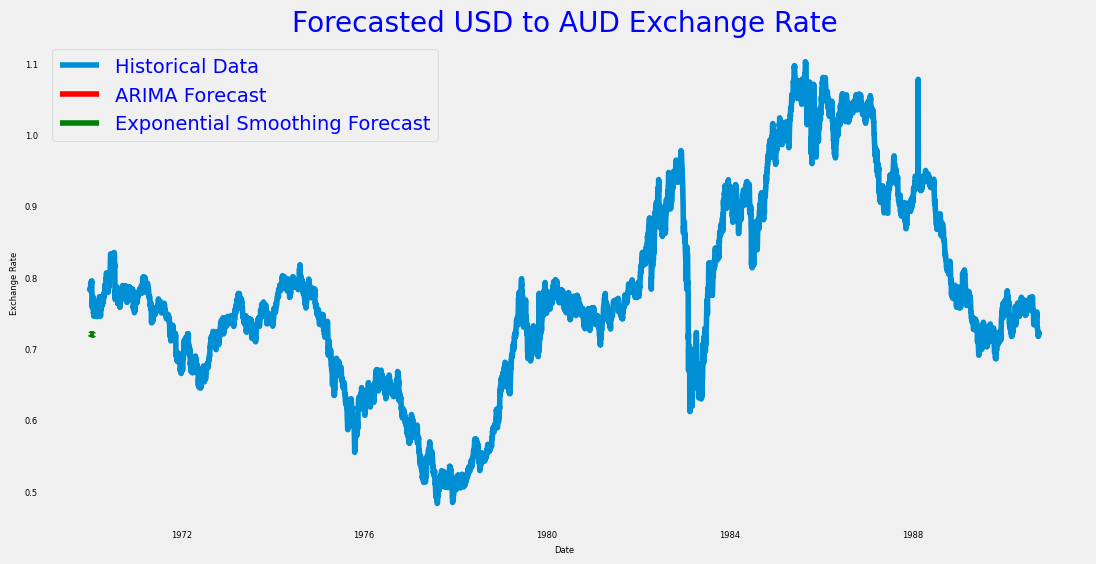

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Exponential Smoothing model
es_model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecasting with Exponential Smoothing
es_forecast = es_model.forecast(steps=forecast_steps)

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='ARIMA Forecast', color='red')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:], es_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Forecasted USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()

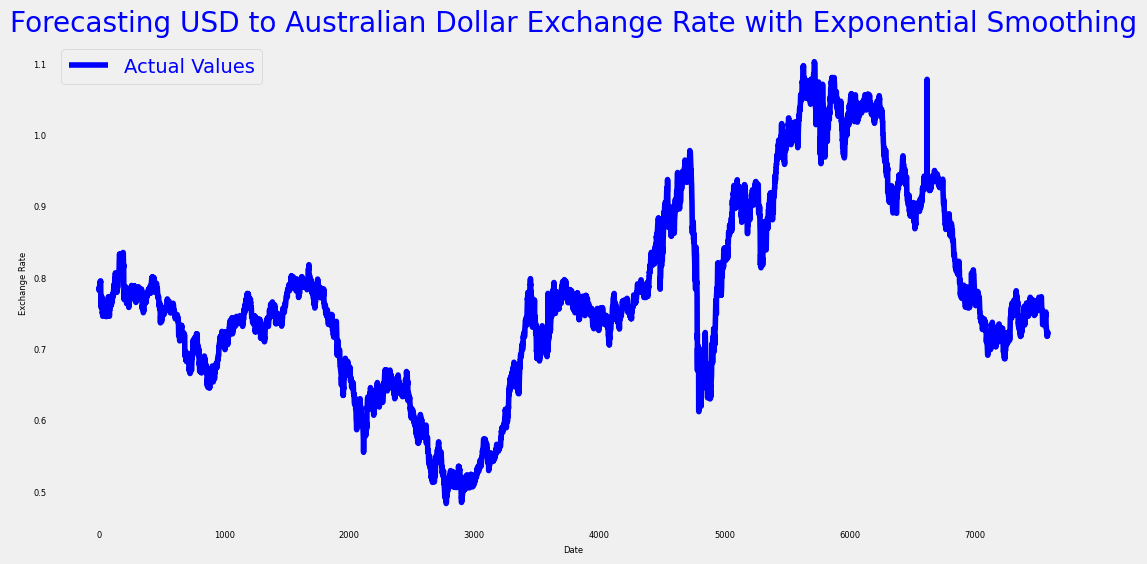

In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Choose the model type (Holt-Winters in this case)
model_exp_smoothing = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12)
model_fit_exp = model_exp_smoothing.fit()

# Forecast the next 12 periods with the Exponential Smoothing model
forecast_exp_smoothing = model_fit_exp.forecast(steps=12)

# Plot actual vs forecasted values for Exponential Smoothing
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Actual Values', color='blue')
#plt.plot(es_forecast, forecast_exp_smoothing, label='Exponential Smoothing Forecast', color='green')
plt.title('Forecasting USD to Australian Dollar Exchange Rate with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()

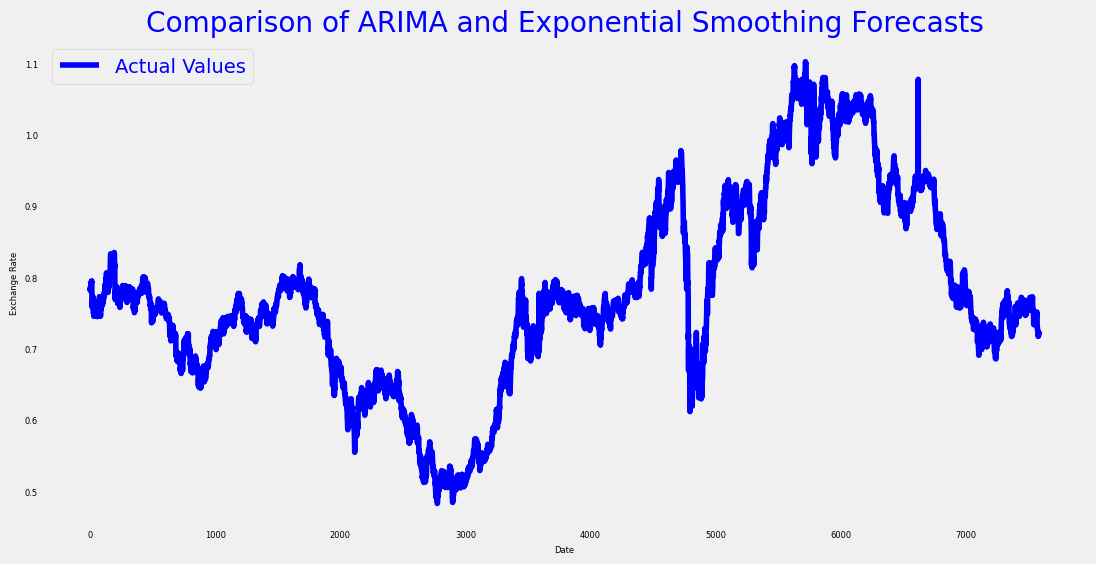

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Actual Values', color='blue')
#plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='orange')
#plt.plot(forecast_index, forecast_exp_smoothing, label='Exponential Smoothing Forecast', color='green')
plt.title('Comparison of ARIMA and Exponential Smoothing Forecasts')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid()
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate error metrics for ARIMA
mae_arima = mean_absolute_error(data['Ex_rate'][-forecast_steps:], forecast)
rmse_arima = mean_squared_error(data['Ex_rate'][-forecast_steps:], forecast, squared=False)

# Print error metrics
print('ARIMA - MAE:', mae_arima, 'RMSE:', rmse_arima)



ARIMA - MAE: 0.012724006489305202 RMSE: 0.016982710912755217
